<a href="https://colab.research.google.com/github/Danil1D/Machine-learning/blob/main/%D0%94%D0%B0%D1%88%D0%BA%D0%B5%D0%B2%D0%B8%D1%87_%D0%BB%D0%B0%D0%B1%E2%84%963(%D0%B7%D0%B0%D0%B2%D0%B4_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#1. Завантаження датасету і виведення перших 5 рядків

from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()
df_california = pd.DataFrame(california.data, columns=california.feature_names)

df_california['target'] = california.target

print(df_california.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object


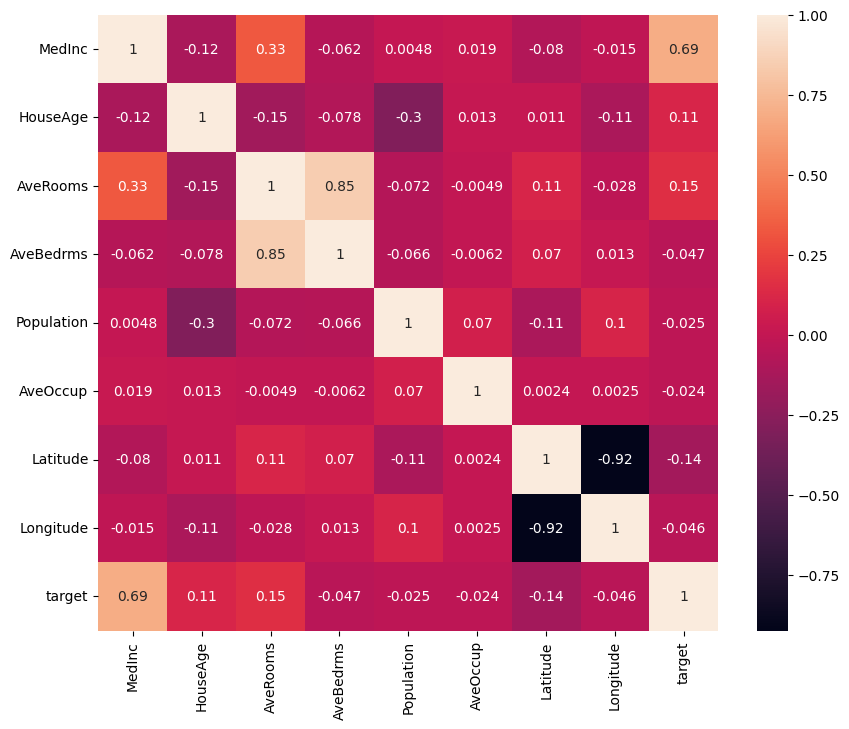

In [14]:
#2. Попередній аналіз даних
print(df_california.isnull().sum())

df_california.fillna(df_california.mean(), inplace=True)

df_california.drop_duplicates(inplace=True)

print(df_california.dtypes)

import seaborn as sns
import matplotlib.pyplot as plt

correlation = df_california.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True)
plt.show()


In [15]:
#3. Масштабування ознак
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_california.drop('target', axis=1))
y = df_california['target']


In [16]:
#4. Поділ на тренувальні і тестові вибірки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
#5. Побудова моделей: Лінійна регресія, RandomForest, Ridge з GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

ridge_model = Ridge()
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)
best_ridge_model = grid_search_ridge.best_estimator_


In [ ]:
#6. Виведення R² і MSE, побудова графіків
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Лінійна регресія': lr_model,
    'RandomForest регресія': best_rf_model,
    'Ridge регресія': best_ridge_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - R²: {r2}, MSE: {mse}")

    # Побудова графіку
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Справжні значення')
    plt.ylabel('Прогнозовані значення')
    plt.title(f'{name}: Справжні vs Прогнозовані значення')
    plt.show()


In [ ]:
#7. Виведення справжніх і прогнозованих значень
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Справжні значення:", y_test.values[:10])
    print("Прогнозовані значення:", y_pred[:10])
